In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd 'drive/My Drive/bep/AES-master'

/content/drive/My Drive/bep/AES-master


In [0]:
ls

 300features_40minwords_10context
 Classification_Methods_Final.ipynb
'Copy of Data_Cleaning_and_Transformation_Word2Vec_final.ipynb'
 Data_Cleaning_and_Transformation_Word2Vec_final.ipynb
 Data_Exploration_Final.ipynb
 dataloading1.py
 dataloading1.pyc
 essay2vec.py
 essay2vec.pyc
 essay2vec.py.gdoc
 logs/
 Neural_Network_Write_Up_final.ipynb
 __pycache__/
 README.md
 requiredimports.py
 requiredimports.pyc
 savetest.txt
 training_set_rel3.xlsx
 wordembedding.png


In [0]:
pip install runipy

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
pip install gensim==0.13.4.1

     |████████████████████████████████| 7.5MB 3.3MB/s 
  Created wheel for gensim: filename=gensim-0.13.4.1-cp27-cp27mu-linux_x86_64.whl size=4815637 sha256=9dac032ba97bcaee2dc33f795dca1589e30d1af4a5c27dcdaa0acdad43c4388f
  Stored in directory: /root/.cache/pip/wheels/cc/4a/36/34fbd4f1e3a18fe5a2bb3d4366a44711ad0c34adc8251829d9
Successfully built gensim
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [0]:
pip install scikit-learn==0.18

In [0]:
!python requiredimports.py

In [0]:
pip install paramiko

     |████████████████████████████████| 215kB 3.2MB/s 
     |████████████████████████████████| 768kB 44.8MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 2.7MB 39.6MB/s 


In [0]:
pip install tensorflow==1.4.0

     |████████████████████████████████| 40.8MB 98kB/s 
     |████████████████████████████████| 1.7MB 31.7MB/s 
     |████████████████████████████████| 890kB 44.5MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp27-none-any.whl size=107221 sha256=92c3fe4b14900ddf338153a906097d2631436e45a6002d2edd343fabe11a141d
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement scikit-learn>=0.19.1, but you'll have scikit-learn 0.18 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.0
    Uninstalling bleach-3.1.0:
      Successfully uninstalled bleach-3.1.0
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-

In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader
#Updated parameters and deprecated functions
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats import spearmanr
import nltk.data
import re
from nltk.corpus import stopwords
import tensorflow as tf
import logging
from gensim.models import word2vec
from sklearn.metrics import cohen_kappa_score
import timeit
from sklearn.model_selection import train_test_split

xl_workbook = pd.ExcelFile('training_set_rel3.xlsx')
df_all = xl_workbook.parse("training_set")
df_all = df_all[df_all['domain1_score']<61]
df_all = df_all.dropna(axis = 1)
df_all = df_all.drop('rater1_domain1', 1)
df_all = df_all.drop('rater2_domain1', 1)
df_all = df_all.drop('essay_id', 1)

X_train, X_test, y_train, y_test = train_test_split(df_all['essay'], df_all['domain1_score'], test_size=0.10)
#print(y_train)
#print(len(y_train))
y_train = y_train.values.reshape((len(y_train),1))
#print(y_train)
y_test = y_test.values.reshape((len(y_test), 1))
#print(y_test)

def essay_to_wordlist(essay_v, remove_stopwords):
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def essay_to_sentences(essay_v, remove_stopwords):
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

sentences = []

for essay_v in X_train:    
    sentences += essay_to_sentences(essay_v, remove_stopwords = True)

for essay_v in X_test:
    sentences += essay_to_sentences(essay_v, remove_stopwords = True)

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

num_features = 300 
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3

print ("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)

model.init_sims(replace=True)

model_name = "300features_40minwords_10context"
model.save(model_name)

def makeFeatureVec(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])        
    featureVec = np.divide(featureVec,nwords)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

print ("Creating average feature vecs for Training Essays")
clean_train_essays = []
for essay_v in X_train:
    clean_train_essays.append( essay_to_wordlist( essay_v, remove_stopwords=True ))
trainDataVecs = getAvgFeatureVecs( clean_train_essays, model, num_features )


clean_test_essays = []
for essay_v in X_test:
    clean_test_essays.append( essay_to_wordlist( essay_v, remove_stopwords=True ))
testDataVecs = getAvgFeatureVecs( clean_test_essays, model, num_features )
  

2020-04-29 00:41:22,160 : INFO : collecting all words and their counts
2020-04-29 00:41:22,162 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-29 00:41:22,191 : INFO : PROGRESS: at sentence #10000, processed 82641 words, keeping 8184 word types
2020-04-29 00:41:22,218 : INFO : PROGRESS: at sentence #20000, processed 166976 words, keeping 11766 word types
2020-04-29 00:41:22,245 : INFO : PROGRESS: at sentence #30000, processed 252601 words, keeping 14741 word types
2020-04-29 00:41:22,272 : INFO : PROGRESS: at sentence #40000, processed 335600 words, keeping 17110 word types
2020-04-29 00:41:22,300 : INFO : PROGRESS: at sentence #50000, processed 419341 words, keeping 19304 word types
2020-04-29 00:41:22,327 : INFO : PROGRESS: at sentence #60000, processed 503362 words, keeping 21344 word types
2020-04-29 00:41:22,355 : INFO : PROGRESS: at sentence #70000, processed 587804 words, keeping 23241 word types


Training model...


2020-04-29 00:41:22,389 : INFO : PROGRESS: at sentence #80000, processed 671500 words, keeping 24915 word types
2020-04-29 00:41:22,417 : INFO : PROGRESS: at sentence #90000, processed 756322 words, keeping 26762 word types
2020-04-29 00:41:22,444 : INFO : PROGRESS: at sentence #100000, processed 841266 words, keeping 28372 word types
2020-04-29 00:41:22,478 : INFO : PROGRESS: at sentence #110000, processed 927140 words, keeping 30058 word types
2020-04-29 00:41:22,512 : INFO : PROGRESS: at sentence #120000, processed 1010691 words, keeping 31505 word types
2020-04-29 00:41:22,539 : INFO : PROGRESS: at sentence #130000, processed 1094750 words, keeping 32963 word types
2020-04-29 00:41:22,567 : INFO : PROGRESS: at sentence #140000, processed 1179885 words, keeping 34462 word types
2020-04-29 00:41:22,596 : INFO : PROGRESS: at sentence #150000, processed 1265757 words, keeping 35818 word types
2020-04-29 00:41:22,624 : INFO : PROGRESS: at sentence #160000, processed 1349035 words, keepi

Creating average feature vecs for Training Essays


In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)

In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader

batch_size = 300
hidden_nodes_1 = 500
hidden_nodes_2 = 750
size = testDataVecs.shape[1]

graph = tf.Graph()
with graph.as_default():

    # Input data.
    with tf.name_scope("Input"):
        tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, size))
        tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 1))
    
    tf_test_dataset = tf.constant(testDataVecs)
      
    layer1_weights = weight_variable([size, hidden_nodes_1])
    layer1_biases = bias_variable([hidden_nodes_1]) 
    
    layer2_weights = weight_variable([hidden_nodes_1, hidden_nodes_2])
    layer2_biases = bias_variable([hidden_nodes_2])
    
    layer3_weights = weight_variable([hidden_nodes_2, 1])
    layer3_biases = bias_variable([1])
    
    def model(data):
        with tf.name_scope("Layer_1"):
            layer1 = tf.nn.relu(tf.matmul(data, layer1_weights) + layer1_biases)
        
        with tf.name_scope("Layer_2"):
            
            layer2 = tf.nn.relu(tf.matmul(layer1, layer2_weights) + layer2_biases)

        with tf.name_scope("Layer_3"):
            layer3 = tf.nn.relu(tf.matmul(layer2, layer3_weights) + layer3_biases)
        return layer3
    
    # Training computation.
    yhat = model(tf_train_dataset)
    
    with tf.name_scope("Loss"):
        loss = tf.reduce_mean(tf.square(yhat - tf_train_labels))
    
    # Optimizer.
    # learning rate decay
    global_step = tf.Variable(0)  # count  number of steps taken.
    start_learning_rate = 0.001
    learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100000, 0.96, staircase=True)
    
    with tf.name_scope("Train"):
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
    
    tf.summary.scalar("loss", loss) #tf.scalar_summary("loss", loss)
    
    # Predictions for the training, validation, and test data.
    train_prediction = yhat
    test_prediction = model(tf_test_dataset)

In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader

test_preds = pd.DataFrame()
# Re-define the function to include the keep probability
l_array = []
start = timeit.timeit()
num_epochs = 3001
def run_session(num_epochs, name):
    with tf.Session(graph=graph) as session:
        writer = tf.summary.FileWriter("logs/", session.graph) #writer = tf.train.SummaryWriter("logs/", session.graph)
        tf.initialize_all_variables().run()
        print("Initialized")
        for epoch in range(num_epochs):
            offset = (epoch * batch_size) % (y_train.shape[0] - batch_size)
            batch_data = trainDataVecs[offset:(offset + batch_size), :]
            batch_labels = y_train[offset:(offset + batch_size)]
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            l_array.append(l)
            if (epoch % 500 == 0):
                print("Minibatch Loss at Epoch {}: {:.3f}".format(epoch, l))
                rho, pval = (spearmanr(predictions, batch_labels))
                print("Minibatch Spearman Score: {:.4f}".format(rho))
        final_rho, pval = spearmanr(test_prediction.eval(), y_test)
        print("Test Spearman Score: {:.4f}".format(final_rho))
        test_preds[name] = test_prediction.eval().ravel()
        filesave = np.zeros((len(y_test), 2))
        to_use = test_prediction.eval()
        
        for ii in range(len(y_test)):           
            filesave[ii, 0] = y_test[ii]
            filesave[ii, 1] = to_use[ii]
        
        np.savetxt('savetest.txt', filesave, delimiter=",", fmt="%d") 
        
run_session(num_epochs, "Deep_NN")
total = timeit.timeit() - start


Initialized
Minibatch Loss at Epoch 0: 120.671
Minibatch Spearman Score: 0.0728
Minibatch Loss at Epoch 500: 4.720
Minibatch Spearman Score: 0.9060
Minibatch Loss at Epoch 1000: 3.189
Minibatch Spearman Score: 0.9303
Minibatch Loss at Epoch 1500: 1.839
Minibatch Spearman Score: 0.9332
Minibatch Loss at Epoch 2000: 2.706
Minibatch Spearman Score: 0.9589
Minibatch Loss at Epoch 2500: 1.328
Minibatch Spearman Score: 0.9602
Minibatch Loss at Epoch 3000: 1.105
Minibatch Spearman Score: 0.9530
Test Spearman Score: 0.9395


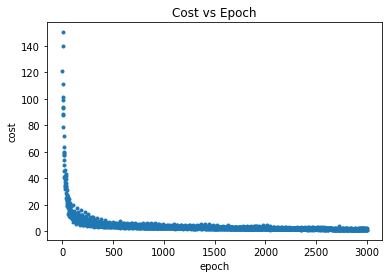

In [0]:
#Code referred from: https://github.com/NaruBeast/Automated-Essay-Grader

plt.plot(range(num_epochs), l_array, '.')
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost vs Epoch")
plt.show()